Chapter 08. Natural Language Processing Basics_1
=====
**via KoNLPy, et cetra...**  
**practice based on book "파이썬으로 데이터 주무르기"**

last modified : 2019-06-21  
created by : 2017136069 Yu JiHoon

---

# Content

1. KoNLPy Preparation [¶](#1.-KoNLPy-Preparation)
2. KoNLPy Practice [¶](#2.-KoNLPy-Practice)
3. KoNLPy Project_1 육아휴직 관련 법안 분석 [¶](#3.-KoNLPy-Project_1-육아휴직-관련-법안-분석)
4. KoNLPy Project_2 문장의 유사도 측정 [¶](#4.-KoNLPy-Project_2-문장의-유사도-측정)

---

## 1. KoNLPy Preparation

### KoNLPy란?
 - 한국어를 위한 자연어 처리(NLP) 모듈
 - GPL v3(or above) license 기반의 오픈소스
 - 다양한 형태소 분석기 포함(Kkma, Komoran, Hannanum, Mecab, etc...)
 - kolaw, kobill 등과 같은 말뭉치들 포함 ...
 
### KoNLPy의 기능들 
 - 문서, 말뭉치 조회
 - collocations(연어) 탐색
     - 연어란 낱말과 낱말의 연결 관계 혹은 이러한 단어의 쌍을 의미(예: "양말"을 "신다", "옷"을 "입다")
 - Chunking, 문장을 유의미한 단위로 묶는 것(http://kkma.snu.ac.kr/concordancer)
 - Generating random text (http://konlpy.org/en/latest/examples/generate/)
 - word cloud 생성

### 의존성
 - Java version 1.7 or above
 - JPype1 0.5.7 or above (Python에서 java lib 접근)
 - MeCab (한국어 형태소 분석기, Optional)

KoNLPy 설치법 (https://konlpy-ko.readthedocs.io/ko/v0.5.1/install/)

In [1]:
# Install nltk corpus package stopwords, punkt
# also, we need wordcloud, gensim module(via pip)
import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

## 2. KoNLPy Practice

#### 2-1. 한글 자연어 처리 기초

In [74]:
# ================================================================================
# 꼬꼬마 형태소 분석기
# ================================================================================
from konlpy.tag import Kkma

kkma = Kkma()
print([attr for attr in dir(kkma) if not attr.startswith('__')])

['jki', 'morphs', 'nouns', 'pos', 'sentences', 'tagset']


In [75]:
# 문장 단위 분리
kkma.sentences('한국어를 분석합시다 너무 재밌겠어요...')

['한국어를 분석 합시다', '너무 재밌겠어요...']

In [76]:
# 명사 추출
kkma.nouns('한국어를 분석합시다 너무 재밌겠어요...')

['한국어', '분석']

In [77]:
# 품사(POS) 태깅
# POS tags http://kkma.snu.ac.kr/documents/?doc=postag

kkma.pos('한국어를 분석합시다 너무 재밌겠어요...')

[('한국어', 'NNG'),
 ('를', 'JKO'),
 ('분석', 'NNG'),
 ('하', 'VV'),
 ('ㅂ시다', 'EFA'),
 ('너무', 'MAG'),
 ('재밌', 'VA'),
 ('겠', 'EPT'),
 ('어요', 'EFN'),
 ('...', 'SE')]

In [78]:
# ================================================================================
# 한나눔 형태소 분석기
# ================================================================================
from konlpy.tag import Hannanum

hannanum = Hannanum()
print([attr for attr in dir(hannanum) if not attr.startswith('__')])

['analyze', 'jhi', 'morphs', 'nouns', 'pos', 'tagset']


In [79]:
# 한나눔 형태소 분석기가 오작동 하는 문제 발생
# KoNLPy Github Issue page에는 관련 Issue 없음
# Hannanum 자체 개발 커뮤니티는 폐쇄된 상태이고 lib도 2016이후로 업데이트 없음

# 한나눔 분석기 사용은 생략

Hannanum.pos(Hannanum(), '한국어를 분석합시다 너무 재밌겠어요...')

[]

In [80]:
# ================================================================================
# 트위터 분석기 (책에는 Twitter이나 KoNLPy v0.4.5부터 Okt로 이름이 바뀜)
# ================================================================================
from konlpy.tag import Okt

okt =  Okt()
print([attr for attr in dir(okt) if not attr.startswith('__')])

['jki', 'morphs', 'nouns', 'phrases', 'pos', 'tagset']


In [81]:
okt.nouns('한국어를 분석합시다 너무 재밌겠어요...')

['한국어', '분석']

In [82]:
okt.morphs('한국어를 분석합시다 너무 재밌겠어요...')

['한국어', '를', '분석', '합시다', '너무', '재밌겠어요', '...']

In [83]:
okt.pos('한국어를 분석합시다 너무 재밌겠어요...')

[('한국어', 'Noun'),
 ('를', 'Josa'),
 ('분석', 'Noun'),
 ('합시다', 'Verb'),
 ('너무', 'Adverb'),
 ('재밌겠어요', 'Adjective'),
 ('...', 'Punctuation')]

#### 2-2. 워드 클라우드

In [84]:
# wordcloud 모듈 사용
from wordcloud import WordCloud, STOPWORDS
from PIL import Image

import numpy as np

# 이상한 나라의 앨리스 전문
txt = open('../data/09. alice.txt').read()
# 마스킹용 엘리스 사진파일 저장
alice_mask = np.array(Image.open('../data/09. alice_mask.png'))


# 불용어(stopword)
# I, My, Me, 조사, 접두어 등과 같이 자주 나타나지만 실제 의미에 큰 기여를 못하는 단어들 
stopwords = set(STOPWORDS)
# 불용어에 said 추가, 소설에서 많이 나오는 불용어임
stopwords.add('said')
# stopwords

#### 사용된 alice_mask 마스크

![alice](../data/09. alice_mask.png)

In [85]:
import matplotlib.pyplot as plt
import platform

# 플랫폼별 폰트 처리
path = "C:/Windows/Fonts/malgun.ttf"
from matplotlib import font_manager, rc
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('System not supported')
    
# Magic function to make matplotlib output shows in jupyter notebook
%matplotlib inline

In [87]:
# ================================================================================
# WordCloud module로 워드 클라우드 생성, alice 소설.txt삽입 후 처리
# ================================================================================

wc = WordCloud(background_color='white', max_words=2000, mask=alice_mask, stopwords=stopwords)
wc = wc.generate(txt)

# wc.words_

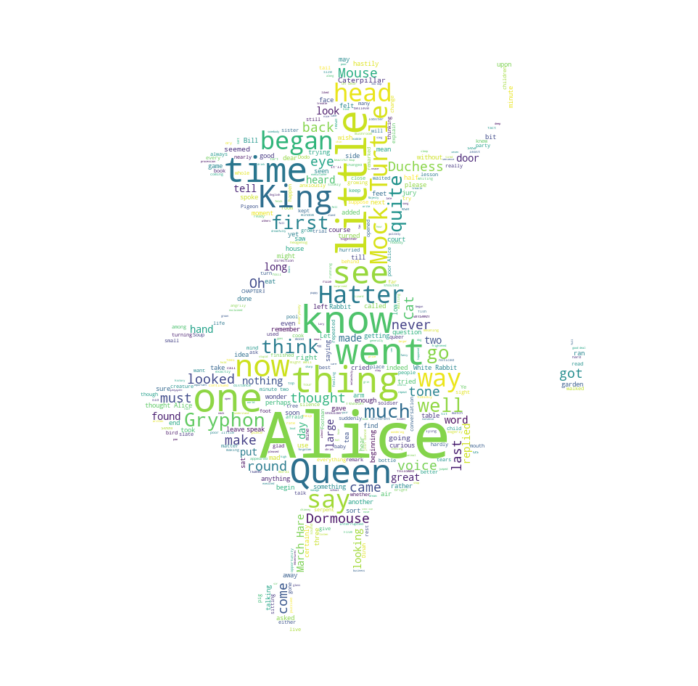

In [92]:
plt.figure(figsize=(12,12))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

## 3. KoNLPy Project_1 육아휴직 관련 법안 분석
#### 3-1. 육아휴직 관련 법안 분석

In [152]:
# Import Korean Bill Corpus
from konlpy.corpus import kobill 
# Natural Language Tool Kit
import nltk

# 대한민국 국회 의안 제 1809890호
files_ko = kobill.fileids()
doc_ko = kobill.open('1809890.txt').read()
# print(doc_ko)

In [153]:
# Okt로 명사 분석

tokens_ko = okt.nouns(doc_ko)
tokens_ko

['지방공무원법',
 '일부',
 '개정',
 '법률',
 '안',
 '정의화',
 '의원',
 '대표',
 '발의',
 '의',
 '안',
 '번',
 '호',
 '발의',
 '연월일',
 '발',
 '의',
 '자',
 '정의화',
 '이명수',
 '김을동',
 '이사철',
 '여상규',
 '안규백',
 '황영철',
 '박영아',
 '김정훈',
 '김학송',
 '의원',
 '인',
 '제안',
 '이유',
 '및',
 '내용',
 '초등학교',
 '저학년',
 '경우',
 '부모',
 '사랑',
 '필요',
 '나이',
 '현재',
 '공무원',
 '자녀',
 '양육',
 '위',
 '육아휴직',
 '수',
 '자녀',
 '나이',
 '만',
 '세',
 '이하',
 '초등학교',
 '저학년',
 '자녀',
 '위',
 '해당',
 '부모님',
 '일자리',
 '곧',
 '출산',
 '의욕',
 '저하',
 '문제',
 '수',
 '것임',
 '따라서',
 '육아휴직',
 '자녀',
 '연령',
 '만',
 '세',
 '이하',
 '개정',
 '것임',
 '안',
 '제',
 '항제',
 '호',
 '법률',
 '제',
 '호',
 '지방공무원법',
 '일부',
 '개정',
 '법률',
 '안',
 '지방공무원법',
 '일부',
 '다음',
 '개정',
 '제',
 '항제',
 '호',
 '중',
 '만',
 '세',
 '이하',
 '초등학교',
 '취학',
 '전',
 '자녀',
 '만',
 '세',
 '이하',
 '취학',
 '중인',
 '경우',
 '초등학교',
 '학년',
 '이하',
 '말',
 '의',
 '자녀',
 '로',
 '부',
 '칙',
 '이',
 '법',
 '공포',
 '날',
 '시행',
 '신',
 '구조',
 '문대비',
 '표',
 '현',
 '행',
 '개',
 '정',
 '안',
 '제',
 '휴직',
 '생',
 '략',
 '제',
 '휴직',
 '현행',
 '공무원',
 '다음',
 '각',
 '호의',
 '느',
 '

In [154]:
nltk_ko = nltk.Text(tokens = tokens_ko, name = '대한민국 국회 의안 제 1809890호')
print([attr for attr in dir(nltk_ko) if not attr.startswith('__') and not attr.startswith('_')], '\n')

print(len(nltk_ko.tokens))
print(len(set(nltk_ko.tokens)))

nltk_ko.vocab()

['collocations', 'common_contexts', 'concordance', 'concordance_list', 'count', 'dispersion_plot', 'findall', 'generate', 'index', 'name', 'plot', 'readability', 'similar', 'tokens', 'unicode_repr', 'vocab'] 

735
250


FreqDist({'육아휴직': 38, '발생': 19, '만': 18, '이하': 18, '비용': 17, '액': 17, '경우': 16, '세': 16, '자녀': 14, '고용': 14, ...})

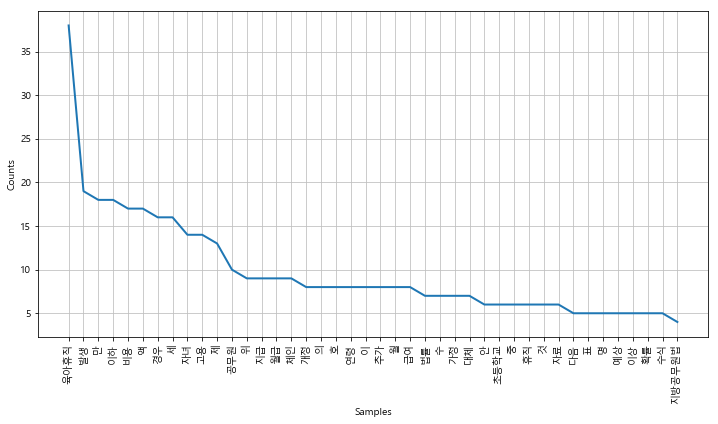

In [155]:
plt.figure(figsize=(12,6))
nltk_ko.plot(42)
plt.show()

In [156]:
stop_words = ['.', '(', ',', ')', "'", '%', '-', 'X', ').', 'x', '발', '인', '위', '제', '중', '것',
              '의', '자', '에', '안', '번', '호', '을', '이', '다', '만', '로', '가', '를']

nltk_ko = [token for token in nltk_ko if token not in stop_words]
nltk_ko

['지방공무원법',
 '일부',
 '개정',
 '법률',
 '정의화',
 '의원',
 '대표',
 '발의',
 '발의',
 '연월일',
 '정의화',
 '이명수',
 '김을동',
 '이사철',
 '여상규',
 '안규백',
 '황영철',
 '박영아',
 '김정훈',
 '김학송',
 '의원',
 '제안',
 '이유',
 '및',
 '내용',
 '초등학교',
 '저학년',
 '경우',
 '부모',
 '사랑',
 '필요',
 '나이',
 '현재',
 '공무원',
 '자녀',
 '양육',
 '육아휴직',
 '수',
 '자녀',
 '나이',
 '세',
 '이하',
 '초등학교',
 '저학년',
 '자녀',
 '해당',
 '부모님',
 '일자리',
 '곧',
 '출산',
 '의욕',
 '저하',
 '문제',
 '수',
 '것임',
 '따라서',
 '육아휴직',
 '자녀',
 '연령',
 '세',
 '이하',
 '개정',
 '것임',
 '항제',
 '법률',
 '지방공무원법',
 '일부',
 '개정',
 '법률',
 '지방공무원법',
 '일부',
 '다음',
 '개정',
 '항제',
 '세',
 '이하',
 '초등학교',
 '취학',
 '전',
 '자녀',
 '세',
 '이하',
 '취학',
 '중인',
 '경우',
 '초등학교',
 '학년',
 '이하',
 '말',
 '자녀',
 '부',
 '칙',
 '법',
 '공포',
 '날',
 '시행',
 '신',
 '구조',
 '문대비',
 '표',
 '현',
 '행',
 '개',
 '정',
 '휴직',
 '생',
 '략',
 '휴직',
 '현행',
 '공무원',
 '다음',
 '각',
 '호의',
 '느',
 '하나',
 '해당',
 '사유',
 '직',
 '임용',
 '휴직',
 '명',
 '수',
 '다만',
 '경우',
 '대통령령',
 '정',
 '사정',
 '직',
 '명',
 '생',
 '략',
 '현행',
 '세',
 '이하',
 '초등학교',
 '취',
 '세',
 '이하',
 '취학',
 '중인',
 '경우',


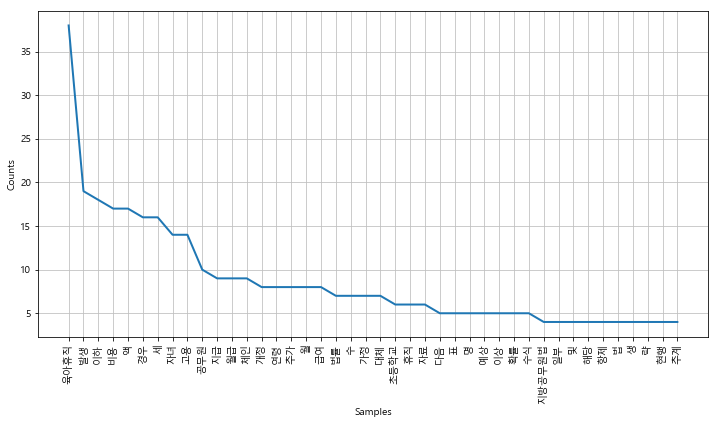

6

In [157]:
nltk_ko = nltk.Text(tokens = nltk_ko, name = '대한민국 국회 의안 제 1809890호')

plt.figure(figsize=(12,6))
nltk_ko.plot(42)
plt.show()

nltk_ko.count('초등학교')

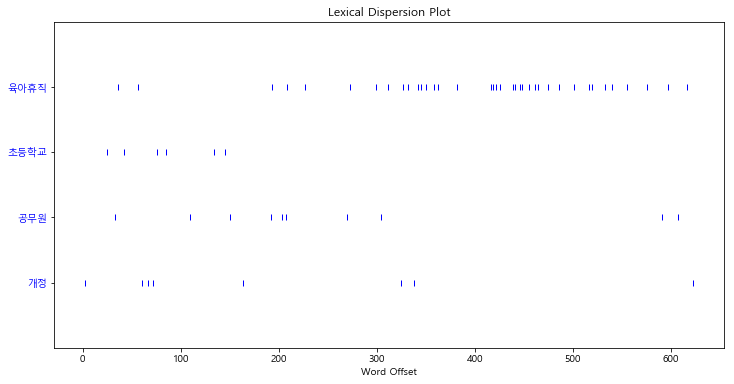

In [158]:
# dispersion(분산)_plot 으로 token의 위치 탐색

plt.figure(figsize=(12,6))
nltk_ko.dispersion_plot(['육아휴직', '초등학교', '공무원', '개정'])

In [165]:
# 특정 token의 주변부 단어 표시
nltk_ko.concordance('육아휴직')

Displaying 25 of 25 matches:
 초등학교 저학년 경우 부모 사랑 필요 나이 현재 공무원 자녀 양육 육아휴직 수 자녀 나이 세 이하 초등학교 저학년 자녀 해당 부모님 일자리 곧
 자녀 해당 부모님 일자리 곧 출산 의욕 저하 문제 수 것임 따라서 육아휴직 자녀 연령 세 이하 개정 것임 항제 법률 지방공무원법 일부 개정 법
직 가능 자녀 연령 세 이하 세 이하 방공 무 법 항제 지방 공무원 육아휴직 가능 자녀 연 령 세 이하 세 이하 교육 공무원 법 항 교육 공무원
가능 자녀 연 령 세 이하 세 이하 교육 공무원 법 항 교육 공무원 육아휴직 가능 자녀 연령 세 이하 세 이하 남녀 고용 평등 일 가정 양립 지
하 세 이하 남녀 고용 평등 일 가정 양립 지원 관 법률 항 근로자 육아휴직 가능 자녀 연령 세 이하 세 이하 조정 함 추가 재정 요가 예상 첨
 경우 해당 함 첨부 사유 개정안 국가 지방 교육 공무원 및 근로자 육아휴직 신청 수 자녀 연령 세 이하 세 이하 상향 조정 함 추가 재정 요가
정 요가 예상 법률 개정안 시행 고 가정 경우 현재 자녀 연령 세이 육아휴직 신청 국가 지방 교육 공무원 및 근로자 대상 대상 연령 확대 육아휴
아휴직 신청 국가 지방 교육 공무원 및 근로자 대상 대상 연령 확대 육아휴직 신청 수가 정도 예상 경우 발생 비용 현행법 월 이나 현재 관련 법
도 예상 경우 발생 비용 현행법 월 이나 현재 관련 법령 개정 추진 육아휴직 지급 월급 액 비례 육아휴직 여가 지급 기 때문 법령 개정 가정 추
법 월 이나 현재 관련 법령 개정 추진 육아휴직 지급 월급 액 비례 육아휴직 여가 지급 기 때문 법령 개정 가정 추계 경우 육아휴직 급여 액 육
급 액 비례 육아휴직 여가 지급 기 때문 법령 개정 가정 추계 경우 육아휴직 급여 액 육아휴직 지급 월급 여의 해당 육아휴직 발생 경우 발생 비
직 여가 지급 기 때문 법령 개정 가정 추계 경우 육아휴직 급여 액 육아휴직 지급 월급 여의 해당 육아휴직 발생 경우 발생 비용 체인 고용 인건

In [166]:
# 문서 내의 연어(collocation) 탐색
nltk_ko.collocations()

초등학교 저학년; 근로자 육아휴직; 육아휴직 대상자; 공무원 육아휴직


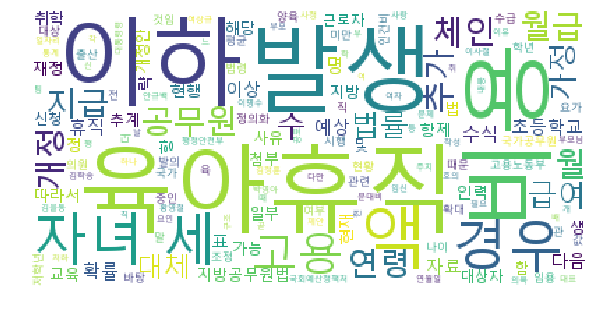

In [178]:
# ============================================================
# WordCloud 생성
# ============================================================

data = nltk_ko.vocab().most_common(150)

# Create WordCloud
wc = WordCloud(font_path='C:/Windows/Fonts/malgun.ttf',
               relative_scaling = 0/4,
               background_color = 'white').generate_from_frequencies(dict(data))

# Display plot
plt.figure(figsize = (10, 6))
plt.imshow(wc)
plt.axis('off')
plt.show()

## 4. KoNLPy Project_2 문장의 유사도 측정
#### 4-1. Naive Bayes Classifier의 이해

**Naive Bayes Classification**

 - 베이즈 정리를 적용한 확률 분류기
 - 특정 상황의 지도 학습에서 효율적
     - 지도 학습???
     - 기계 학습의 방법 중 한 가지(supervised, unsupervised, reinforcement)
     - 학습을 위한 데이터에 정답이 명시되어 있다 ({data, label} 형태처럼)
 - 왜 Naive인가?? : 모든 데이터들의 특성이 독립적이라고 판단하기 때문

In [275]:
from nltk.tokenize import word_tokenize
from konlpy.tag import Okt

okt = Okt()
# 기반 데이터 생성
train_data = [('영화에 자극적인 폭발이 있습니다', 'Action'),
              ('마지막 전투 끝엔 복수가 있다', 'Action'),
              ('영화가 신난다 재미있다', 'Comedy'),
              ('친구와 떠나는 신나는 모험', 'Comedy'),
              ('복수만을 위한 여정 122분의 자극', 'Action'),
              ('재미있는 여정 방심할 수 없는 반전이 있다', 'Comedy')]

# 말뭉치 생성
corpora = set(word.lower() for sentence in train_data
                             for word in word_tokenize(sentence[0]))
corpora

{'122분의',
 '끝엔',
 '떠나는',
 '마지막',
 '모험',
 '반전이',
 '방심할',
 '복수가',
 '복수만을',
 '수',
 '신나는',
 '신난다',
 '없는',
 '여정',
 '영화가',
 '영화에',
 '위한',
 '있다',
 '있습니다',
 '자극',
 '자극적인',
 '재미있는',
 '재미있다',
 '전투',
 '친구와',
 '폭발이'}

In [276]:
# 말뭉치를 기준으로 train_data 문장에 속한 단어인지 아닌지를 기록
train = [({word: (word in word_tokenize(x[0])) for word in corpora}, x[1])
                                                 for x in train_data]
# train

In [277]:
# Naive Bayes 분류기를 가공된 train_data로 생성
# 각 단어들에 대한 가중치 출력
classifier = nltk.NaiveBayesClassifier.train(train)
classifier.show_most_informative_features()

Most Informative Features
                     영화에 = False          Comedy : Action =      1.4 : 1.0
                    있습니다 = False          Comedy : Action =      1.4 : 1.0
                      위한 = False          Comedy : Action =      1.4 : 1.0
                     친구와 = False          Action : Comedy =      1.4 : 1.0
                     영화가 = False          Action : Comedy =      1.4 : 1.0
                     신난다 = False          Action : Comedy =      1.4 : 1.0
                       수 = False          Action : Comedy =      1.4 : 1.0
                      없는 = False          Action : Comedy =      1.4 : 1.0
                    자극적인 = False          Comedy : Action =      1.4 : 1.0
                      모험 = False          Action : Comedy =      1.4 : 1.0


In [278]:
test_input = {word.lower(): (word in word_tokenize('친구를 위한 모험 자극적인 재미'.lower()))
                             for word in corpora}
# test_input

In [279]:
classifier.classify(test_input)

'Action'

In [280]:
# 한국어는 단어의 변형이 쉽게 일어나기 때문에 형태소 분석을 통한 분류가 필요하다!
# token에 태그를 붙여주는 사용자 정의 tokenize 함수
# norm = normalization(정규화), stem = stemming(어간 추출)
def tokenize(doc):
    return ['/'.join(tag) for tag in okt.pos(doc, norm=True, stem=True)]

# 말뭉치 속 단어 존재여부 구분 함수
def term_exists(doc, token_list):
    return {word: (word in set(doc)) for word in token_list}

train_docs = [(tokenize(row[0]), row[1]) for row in train_data]
train_docs

[(['영화/Noun',
   '에/Josa',
   '자극/Noun',
   '적/Suffix',
   '인/Josa',
   '폭발/Noun',
   '이/Josa',
   '있다/Adjective'],
  'Action'),
 (['마지막/Noun',
   '전투/Noun',
   '끝/Noun',
   '엔/Josa',
   '복수/Noun',
   '가/Josa',
   '있다/Adjective'],
  'Action'),
 (['영화/Noun', '가/Josa', '신나다/Adjective', '재미있다/Adjective'], 'Comedy'),
 (['친구/Noun', '와/Josa', '떠나다/Verb', '신나다/Adjective', '모험/Noun'], 'Comedy'),
 (['복수/Noun',
   '만을/Josa',
   '위/Noun',
   '한/Josa',
   '여정/Noun',
   '122분/Number',
   '의/Foreign',
   '자극/Noun'],
  'Action'),
 (['재미있다/Adjective',
   '여정/Noun',
   '방심하다/Adjective',
   '수/Noun',
   '없다/Adjective',
   '반전/Noun',
   '이/Josa',
   '있다/Adjective'],
  'Comedy')]

In [281]:
# 전체 말뭉치 생성
tokens = [t for d in train_docs for t in d[0]]
print(tokens, '\n')

# 이전의 기반 데이터들을 다시 처리
train_data = [(term_exists(d, tokens), c) for d,c in train_docs]
train_data

['영화/Noun', '에/Josa', '자극/Noun', '적/Suffix', '인/Josa', '폭발/Noun', '이/Josa', '있다/Adjective', '마지막/Noun', '전투/Noun', '끝/Noun', '엔/Josa', '복수/Noun', '가/Josa', '있다/Adjective', '영화/Noun', '가/Josa', '신나다/Adjective', '재미있다/Adjective', '친구/Noun', '와/Josa', '떠나다/Verb', '신나다/Adjective', '모험/Noun', '복수/Noun', '만을/Josa', '위/Noun', '한/Josa', '여정/Noun', '122분/Number', '의/Foreign', '자극/Noun', '재미있다/Adjective', '여정/Noun', '방심하다/Adjective', '수/Noun', '없다/Adjective', '반전/Noun', '이/Josa', '있다/Adjective'] 



[({'영화/Noun': True,
   '에/Josa': True,
   '자극/Noun': True,
   '적/Suffix': True,
   '인/Josa': True,
   '폭발/Noun': True,
   '이/Josa': True,
   '있다/Adjective': True,
   '마지막/Noun': False,
   '전투/Noun': False,
   '끝/Noun': False,
   '엔/Josa': False,
   '복수/Noun': False,
   '가/Josa': False,
   '신나다/Adjective': False,
   '재미있다/Adjective': False,
   '친구/Noun': False,
   '와/Josa': False,
   '떠나다/Verb': False,
   '모험/Noun': False,
   '만을/Josa': False,
   '위/Noun': False,
   '한/Josa': False,
   '여정/Noun': False,
   '122분/Number': False,
   '의/Foreign': False,
   '방심하다/Adjective': False,
   '수/Noun': False,
   '없다/Adjective': False,
   '반전/Noun': False},
  'Action'),
 ({'영화/Noun': False,
   '에/Josa': False,
   '자극/Noun': False,
   '적/Suffix': False,
   '인/Josa': False,
   '폭발/Noun': False,
   '이/Josa': False,
   '있다/Adjective': True,
   '마지막/Noun': True,
   '전투/Noun': True,
   '끝/Noun': True,
   '엔/Josa': True,
   '복수/Noun': True,
   '가/Josa': True,
   '신나다/Adjective': False,
   '재미있다/Adjective':

In [312]:
# 향상된 train_data로 Naive Bayes 분류기 재생성
classifier = nltk.NaiveBayesClassifier.train(train_data)
classifier.show_most_informative_features()

# 테스트 입력 '친구를 위한 모험 자극적인 재미'를 다시 처리
test_docs = tokenize('친구와의 모험 마지막 재미')
test_docs

Most Informative Features
                 자극/Noun = False          Comedy : Action =      2.3 : 1.0
                 복수/Noun = False          Comedy : Action =      2.3 : 1.0
           신나다/Adjective = False          Action : Comedy =      2.3 : 1.0
          재미있다/Adjective = False          Action : Comedy =      2.3 : 1.0
            있다/Adjective = False          Comedy : Action =      1.7 : 1.0
            있다/Adjective = True           Action : Comedy =      1.7 : 1.0
          방심하다/Adjective = False          Action : Comedy =      1.4 : 1.0
                  끝/Noun = False          Comedy : Action =      1.4 : 1.0
             122분/Number = False          Comedy : Action =      1.4 : 1.0
                  와/Josa = False          Action : Comedy =      1.4 : 1.0


['친구/Noun', '와의/Josa', '모험/Noun', '마지막/Noun', '재미/Noun']

In [313]:
# 테스트 입력값의 단어들의 존재여부 포함하도록 처리
test_input = {word: (word in tokens) for word in test_docs}
test_input

{'친구/Noun': True,
 '와의/Josa': False,
 '모험/Noun': True,
 '마지막/Noun': True,
 '재미/Noun': False}

In [314]:
classifier.classify(test_input)

'Comedy'

#### 4-2. 문장의 유사도 측정하기

 **sklearn(scikit learn) 패키지의 CountVectorizer를 사용**
 
  - sklearn : 머신러닝 교육을 위한 파이썬 패키지
  - CountVectorizer : 문서에서 생성한 단어 token의 수를 Bag of Words 인코딩한 Vector로 만드는 전처리기
  - BOW Encoding : 단어의 순서는 무시하고 빈도에만 집중하여 수치화하는 인코딩
  - Feature : CountVectorizer에서 내부절차를 걸쳐 결정된 Token의 단위

In [341]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
vectorizer

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [367]:
# 연습용 문장들
contents = ['메리랑 놀러가고 싶지만 바쁜데 어떻하죠?',
            '메리는 공원에서 산책하고 노는 것을 싫어해요',
            '메리는 공원에서 노는 것도 싫어해요. 이상해요.',
            '먼 곳으로 여행을 떠나고 싶은데 너무 바빠서 그러질 못하고 있어요']

X = vectorizer.fit_transform(contents)
print('(Sentence Index, Feature Index), Freq of Feature in Doc\n')
print(X)
vectorizer.get_feature_names()

(Sentence Index, Feature Index), Freq of Feature in Doc

  (0, 18)	1
  (0, 13)	1
  (0, 17)	1
  (0, 7)	1
  (0, 10)	1
  (1, 15)	1
  (1, 1)	1
  (1, 6)	1
  (1, 14)	1
  (1, 3)	1
  (1, 9)	1
  (2, 20)	1
  (2, 0)	1
  (2, 15)	1
  (2, 6)	1
  (2, 3)	1
  (2, 9)	1
  (3, 21)	1
  (3, 11)	1
  (3, 4)	1
  (3, 12)	1
  (3, 5)	1
  (3, 16)	1
  (3, 8)	1
  (3, 19)	1
  (3, 2)	1


['것도',
 '것을',
 '곳으로',
 '공원에서',
 '그러질',
 '너무',
 '노는',
 '놀러가고',
 '떠나고',
 '메리는',
 '메리랑',
 '못하고',
 '바빠서',
 '바쁜데',
 '산책하고',
 '싫어해요',
 '싶은데',
 '싶지만',
 '어떻하죠',
 '여행을',
 '이상해요',
 '있어요']

In [368]:
# ============================================================
# 한글 문장에 대한 더 함리적인 벡터화
# ============================================================

okt = Okt()

contents_tokens = [okt.morphs(row) for row in contents]
contents_tokens

[['메리', '랑', '놀러', '가고', '싶지만', '바쁜데', '어떻하죠', '?'],
 ['메리', '는', '공원', '에서', '산책', '하고', '노', '는', '것', '을', '싫어해요'],
 ['메리', '는', '공원', '에서', '노', '는', '것', '도', '싫어해요', '.', '이상해요', '.'],
 ['먼',
  '곳',
  '으로',
  '여행',
  '을',
  '떠나고',
  '싶은데',
  '너무',
  '바빠서',
  '그러질',
  '못',
  '하고',
  '있어요']]

In [369]:
# vectorizer 함수에서 이용하기 쉽도록 가공
contents_for_vectorize = []

for content in contents_tokens:
    sentence = ''
    for word in content:
        sentence = sentence + ' ' + word
        
    contents_for_vectorize.append(sentence)
    
contents_for_vectorize

[' 메리 랑 놀러 가고 싶지만 바쁜데 어떻하죠 ?',
 ' 메리 는 공원 에서 산책 하고 노 는 것 을 싫어해요',
 ' 메리 는 공원 에서 노 는 것 도 싫어해요 . 이상해요 .',
 ' 먼 곳 으로 여행 을 떠나고 싶은데 너무 바빠서 그러질 못 하고 있어요']

In [370]:
# Feature 추출
X = vectorizer.fit_transform(contents_for_vectorize)
vectorizer.get_feature_names()

['가고',
 '공원',
 '그러질',
 '너무',
 '놀러',
 '떠나고',
 '메리',
 '바빠서',
 '바쁜데',
 '산책',
 '싫어해요',
 '싶은데',
 '싶지만',
 '어떻하죠',
 '에서',
 '여행',
 '으로',
 '이상해요',
 '있어요',
 '하고']

In [371]:
# 각 문장들에 대한 Feature 존재 여부 벡터
X.toarray()
# X.toarray().transpose()

array([[1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1],
       [0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0],
       [0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1]],
      dtype=int64)

In [372]:
# 문장 유사도를 판정할 입력 데이터
# 편의를 위해 가공된 형태로 저장한다.
new_post_for_vectorize = [' 메리 랑 공원 에서 산책 하고 놀고 싶어요']
new_post_vec = vectorizer.transform(new_post_for_vectorize)
new_post_vec.toarray()

array([[0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1]],
      dtype=int64)

In [379]:
# ============================================================
# 문장 벡터 간 거리 구하기
# ============================================================

import scipy as sp

# 두 벡터의 차를 구한 후 그 값의 Norm을 구한다.
# Norm : 벡터의 길이 혹은 크기를 측정하는 방법(함수). 목적에 따라 다양한 종류의 Norm을 사용한다.
def dist_raw(v1, v2):
    delta = v1 - v2
    return sp.linalg.norm(delta.toarray())

best_doc = None
best_dist = 65535
best_i = None

# 문장 벡터 간 거리를 구하여 출력

for i in range(0, X.shape[0]):
    post_vec = X.getrow(i)
    d = dist_raw(post_vec, new_post_vec)
    
    print("== Post %i with dist = %.2f    : %s" %(i, d, contents[i]))
    
    if d < best_dist:
        best_dist = d
        best_i = i
        
        
# 입력값과 가장 유사한 문장 출력.
# 뜻은 반대되는 문장이지만 현재 구현한 방법은 두 문장 사이에 동일한 Feature의 개수만을 따지므로
# 두 문장의 형태가 가장 유사한 쌍이 연결되게 된다.
print("\nBest post is %i, dist = %.2f" % (best_i, best_dist))
print('input --->', '메리랑 공원에서 산책하고 놀고 싶어요')
print('output -->', contents[best_i])

== Post 0 with dist = 3.00    : 메리랑 놀러가고 싶지만 바쁜데 어떻하죠?
== Post 1 with dist = 1.00    : 메리는 공원에서 산책하고 노는 것을 싫어해요
== Post 2 with dist = 2.00    : 메리는 공원에서 노는 것도 싫어해요. 이상해요.
== Post 3 with dist = 3.46    : 먼 곳으로 여행을 떠나고 싶은데 너무 바빠서 그러질 못하고 있어요

Best post is 1, dist = 1.00
input ---> 메리랑 공원에서 산책하고 놀고 싶어요
output --> 메리는 공원에서 산책하고 노는 것을 싫어해요


**여기서 tfidf 라는 개념을 적용한다!**

 tf(term frequency)와 idf(inverse document frequency)는 텍스트 마이닝에서 사용하는  
일종의 단어별로 부과하는 가중치이다.  
 tf는 어떤 단어가 문서 내에서 자주 등장할수록 중요도가 높을 것으로 보고,  
idf는 비교하는 모든 문서에 만약 같은 단어가 있다면 문서 간의 비교에서는 중요한 단어가  
아닌 핵심 어휘로 본다.

In [381]:
# tf, idf를 계산하는 함수
def tfidf(t, d, D):
    tf = float(d.count(t)) / sum(d.count(w) for w in set(d))
    idf = sp.log( float(len(D)) / (len([doc for doc in D if t in doc])) )
    return tf, idf

a, abb, abc = ['a'], ['a', 'b', 'b'], ['a', 'b', 'c']
D = [a,abb,abc]

# tf, idf 값의 예시 출력
# a, abb, abc 데이터 모두에 'a'가 있기 때문에 'a'의 idf는 0이다.
# tf는 해당 문자가 그 데이터에서 등장하는 비율을 중요도로 계산한다.
print(tfidf('a', a, D))
print(tfidf('b', abb, D))
print(tfidf('a', abc, D))
print(tfidf('b', abc, D))
print(tfidf('c', abc, D))

(1.0, 0.0)
(0.6666666666666666, 0.4054651081081644)
(0.3333333333333333, 0.0)
(0.3333333333333333, 0.4054651081081644)
(0.3333333333333333, 1.0986122886681098)


#### 4-3. Tfidf를 적용한 문장의 유사도 판정
scikit-learn의 TfidfVectorizer를 사용한다.

In [383]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(decode_error = 'ignore')

# 동일한 방식으로 기존 데이터들을 처리
contents_tokens = [okt.morphs(row) for row in contents]
contents_for_vectorize = []

for content in contents_tokens:
    sentence = ''
    for word in content:
        sentence = sentence + ' ' + word
        
    contents_for_vectorize.append(sentence)
    
X = vectorizer.fit_transform(contents_for_vectorize)
X.toarray()

array([[0.43003652, 0.        , 0.        , 0.        , 0.43003652,
        0.        , 0.27448674, 0.        , 0.43003652, 0.        ,
        0.        , 0.        , 0.43003652, 0.43003652, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.39954636, 0.        , 0.        , 0.        ,
        0.        , 0.32346721, 0.        , 0.        , 0.5067739 ,
        0.39954636, 0.        , 0.        , 0.        , 0.39954636,
        0.        , 0.        , 0.        , 0.        , 0.39954636],
       [0.        , 0.43584673, 0.        , 0.        , 0.        ,
        0.        , 0.35285549, 0.        , 0.        , 0.        ,
        0.43584673, 0.        , 0.        , 0.        , 0.43584673,
        0.        , 0.        , 0.55281632, 0.        , 0.        ],
       [0.        , 0.        , 0.34056989, 0.34056989, 0.        ,
        0.34056989, 0.        , 0.34056989, 0.        , 0.        ,
        0.        , 0.34056989, 0.        , 0

In [384]:
vectorizer.get_feature_names()

['가고',
 '공원',
 '그러질',
 '너무',
 '놀러',
 '떠나고',
 '메리',
 '바빠서',
 '바쁜데',
 '산책',
 '싫어해요',
 '싶은데',
 '싶지만',
 '어떻하죠',
 '에서',
 '여행',
 '으로',
 '이상해요',
 '있어요',
 '하고']

In [390]:
# 입력할 데이터도 벡터화하여 저장한다
# '근처 공원에 메리랑 놀러가고 싶네요'
new_post_vec = vectorizer.transform([' 근처 공원 에 메리 랑 놀 러 가고 싶네 요'])

# 벡터 간의 거리를 계산하는 함수
def dist_norm(v1, v2):
    v1_normalized = v1 / sp.linalg.norm(v1.toarray())
    v2_normalized = v2 / sp.linalg.norm(v2.toarray())
    
    return sp.linalg.norm((v1_normalized - v2_normalized).toarray())

# ============================================================
# 결과 출력
# ============================================================

best_doc, best_dist, best_i = None, 65535, None

for i in range(0, X.shape[0]):
    post_vec = X.getrow(i)
    d = dist_norm(post_vec, new_post_vec)
    
    print("== Post %i with dist = %.2f    : %s" %(i, d, contents[i]))
    
    if d < best_dist:
        best_dist = d
        best_i = i
        
# tfidf 를 적용하여 새롭게 문장 유사도를 계산한 결과,
# 단순히 문장의 형태가 유사한 결과가 아닌
# Feature의 가중치에 따라 의미가 유사한 문장이 결과로 출력되게 되었다!
print("\nBest post is %i, dist = %.2f" % (best_i, best_dist))
print('input --->', '근처 공원에 메리랑 놀러가고 싶네요')
print('output -->', contents[best_i])

== Post 0 with dist = 1.07    : 메리랑 놀러가고 싶지만 바쁜데 어떻하죠?
== Post 1 with dist = 1.13    : 메리는 공원에서 산책하고 노는 것을 싫어해요
== Post 2 with dist = 1.10    : 메리는 공원에서 노는 것도 싫어해요. 이상해요.
== Post 3 with dist = 1.41    : 먼 곳으로 여행을 떠나고 싶은데 너무 바빠서 그러질 못하고 있어요

Best post is 0, dist = 1.07
input ---> 근처 공원에 메리랑 놀러가고 싶네요
output --> 메리랑 놀러가고 싶지만 바쁜데 어떻하죠?
